In [1]:
import os
import pickle
import numpy as np
import configparser
import pandas as pd
from fsl.data.image import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
t1_paths = [ 
    'T1s/T1_brain_to_MNI_1.nii.gz',    
    'T1s/T1_brain_to_MNI_1047.nii.gz', 
    'T1s/T1_brain_to_MNI_404.nii.gz',  
    'T1s/T1_brain_to_MNI_497.nii.gz',  
    'T1s/T1_brain_to_MNI_576.nii.gz',  
    'T1s/T1_brain_to_MNI_597.nii.gz',
    'T1s/T1_brain_to_MNI_683.nii.gz',
    'T1s/T1_brain_to_MNI_746.nii.gz',
    'T1s/T1_brain_to_MNI_815.nii.gz',
    'T1s/T1_brain_to_MNI_825.nii.gz',
    'T1s/T1_brain_to_MNI_869.nii.gz',
    'T1s/T1_brain_to_MNI_918.nii.gz'
]

In [32]:
print(len(t1_paths))

12


# T1-weighted images are in no way quantitative

0.0 1574.5524 360.49988 (80, 96, 80)
-0.00064004306 2186.5493 378.1331 (80, 96, 80)
-0.017667057 2223.5576 391.9747 (80, 96, 80)
-4.533338e-08 2158.6553 387.9003 (80, 96, 80)
-2.8339116e-07 1387.3081 307.33264 (80, 96, 80)
0.0 2134.9507 349.61798 (80, 96, 80)
-2.5085023e-07 1600.3927 364.44537 (80, 96, 80)
0.0 1879.6287 330.33255 (80, 96, 80)
-7.936807e-10 1508.4991 303.11765 (80, 96, 80)
0.0 1640.6802 350.0938 (80, 96, 80)
-1.4693404e-06 1276.1948 291.71036 (80, 96, 80)
-1.5430125e-07 2054.6904 377.16953 (80, 96, 80)


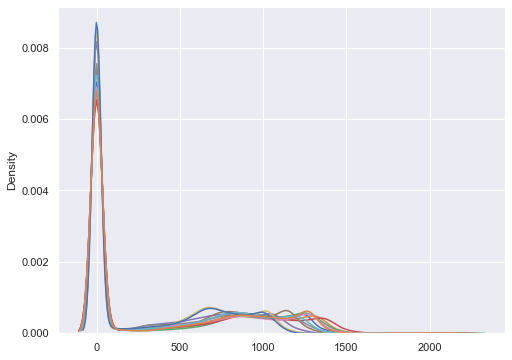

In [24]:
plt.figure(figsize=(8,6))
for path in t1_paths:
    t1 = Image(path).data
    print(np.min(t1), np.max(t1), np.mean(t1), np.shape(t1))
    sns.kdeplot(t1.flatten())

In [22]:
for path in t1_paths:
    t1 = Image(path).data
    t1 = t1 / np.mean(t1)
    print(np.min(t1), '|' , np.max(t1))

0.0 | 4.367692
-1.6926397e-06 | 5.782486
-4.507193e-05 | 5.672707
-1.1686864e-10 | 5.5649743
-9.220991e-10 | 4.514028
0.0 | 6.1065245
-6.883068e-10 | 4.39131
0.0 | 5.69011
-2.6183916e-12 | 4.9766126
0.0 | 4.6864014
-5.036984e-09 | 4.37487
-4.0910317e-10 | 5.4476576


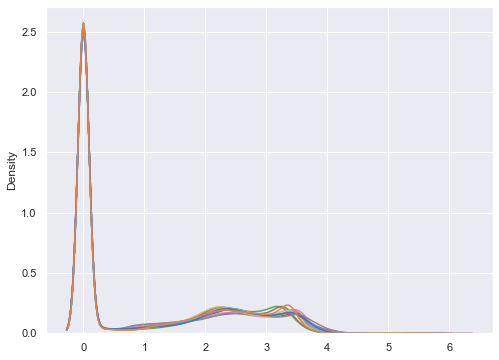

In [25]:
plt.figure(figsize=(8,6))
for path in t1_paths:
    t1 = Image(path).data
    t1 = t1 / np.mean(t1)
    sns.kdeplot(t1.flatten())

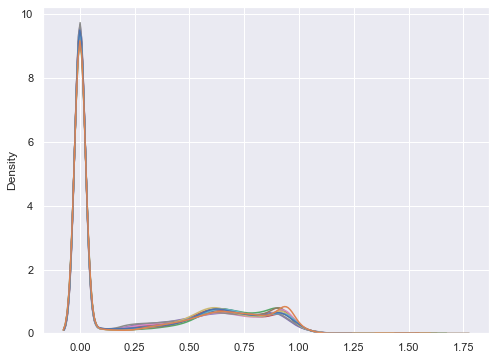

In [26]:
plt.figure(figsize=(8,6))
for path in t1_paths:
    t1 = Image(path).data
    t1 = t1 / np.mean(t1)
    t1 = t1 / np.percentile(t1, 99)
    sns.kdeplot(t1.flatten())

3.7114241081476216


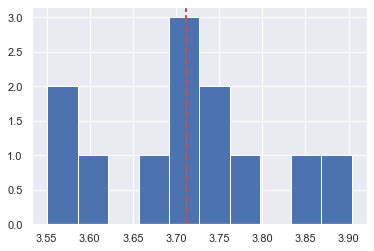

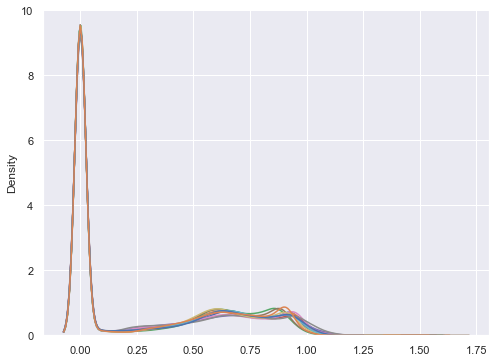

In [31]:
p99 = []

for path in t1_paths:
    t1 = Image(path).data
    t1 = t1 / np.mean(t1)
    t1p99 = np.percentile(t1, 99)
    p99.append(t1p99)
    
p99 = np.array(p99)
plt.figure()
plt.hist(p99);
plt.axvline(x=np.mean(p99), color='r', linestyle='dashed', linewidth=2)
print(np.mean(p99))
    
plt.figure(figsize=(8,6))
for path in t1_paths:
    t1 = Image(path).data
    t1 = t1 / np.mean(t1)
    t1 = t1 / np.mean(p99)
    sns.kdeplot(t1.flatten())

In [36]:
path = t1_paths[1]
img = Image(path).data
header = Image(path).header
img = img / img.mean() / np.mean(p99)
Image(img, header=header).save('test.nii.gz')

In [37]:
t1_paths[1]

'T1s/T1_brain_to_MNI_1047.nii.gz'

In [38]:
path = t1_paths[0]
print(path)
img = Image(path).data
header = Image(path).header
img = img / img.mean() / np.mean(p99)
Image(img, header=header).save('test1.nii.gz')

T1s/T1_brain_to_MNI_1.nii.gz


<AxesSubplot:ylabel='Density'>

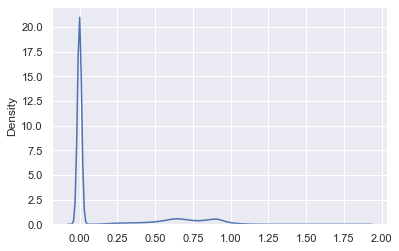

In [39]:
path1mm = 'T1s/T1_brain_to_MNI.nii.gz'
t1 = Image(path1mm).data
t1 = t1 / np.mean(t1)
t1 = t1 / np.percentile(t1, 99)
sns.kdeplot(t1.flatten())

-53.0 2614.0
257.05576
5.368484973907471


<AxesSubplot:ylabel='Density'>

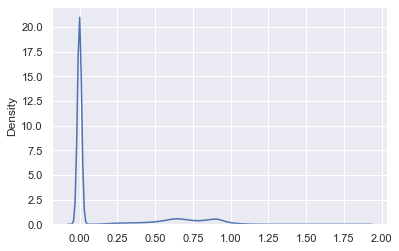

In [40]:
t1 = Image(path1mm).data
print(t1.min(), t1.max())
print(t1.mean())
t1 = t1 / np.mean(t1)
print(np.percentile(t1,99))
t1 = t1 / np.percentile(t1, 99)
sns.kdeplot(t1.flatten())

In [46]:
p99norm = []
p99orig = []
means = []

for path in t1_paths:
    t1 = Image(path).data
    p99o = np.percentile(t1,99)
    mn = np.mean(t1)
    means.append(mn)
    p99orig.append(p99o)
    t1 = t1 / np.mean(t1)
    t1p99 = np.percentile(t1, 99)
    p99norm.append(t1p99)
    
p99norm = np.array(p99norm)
p99orig = np.array(p99orig)
means = np.array(means)

print(p99orig)
print(means)
print(p99norm)
print(p99orig/means)
print('---')
print(np.mean(p99norm))
print(np.mean(p99orig/means))


# plt.figure()
# plt.hist(p99);
# plt.axvline(x=np.mean(p99), color='r', linestyle='dashed', linewidth=2)
# print(np.mean(p99))
    
# plt.figure(figsize=(8,6))
# for path in t1_paths:
#     t1 = Image(path).data
#     t1 = t1 / np.mean(t1)
#     t1 = t1 / np.mean(p99)
#     sns.kdeplot(t1.flatten())

[1340.53024414 1405.73890381 1391.82369385 1463.84746948 1184.2277832
 1254.93469238 1369.40574219 1289.50085938 1109.40727417 1292.52478516
 1092.59267578 1348.44470703]
[360.49988 378.1331  391.9747  387.9003  307.33264 349.61798 364.44537
 330.33255 303.11765 350.0938  291.71036 377.16953]
[3.71853186 3.71757701 3.55079983 3.77377246 3.85324446 3.58944546
 3.75750618 3.90364447 3.6599892  3.69193841 3.74547108 3.57516886]
[3.71853176 3.7175771  3.55079981 3.77377247 3.85324441 3.58944551
 3.75750618 3.90364455 3.65998909 3.6919384  3.74547097 3.57516877]
---
3.7114241081476216
3.711424084087128


In [3]:
path1mm = 'T1s/T1_brain_to_MNI.nii.gz'

In [6]:
img = Image(path1mm).data

In [11]:
img.shape

(182, 218, 182)

In [12]:
from fsl.utils.image.roi import roi

In [13]:
img1 = roi(Image(path1mm),((10,170),(12,204),(0,160))).data

In [14]:
img1.shape

(160, 192, 160)

In [15]:
Image(img1).save('img1.nii.gz')

In [16]:
def crop_center(data, out_sp=(160, 192, 160)):
    """
    Returns the center part of volume data.
    crop: in_sp > out_sp
    Example: 
    data.shape = np.random.rand(182, 218, 182)
    out_sp = (160, 192, 160)
    data_out = crop_center(data, out_sp)
    """
    in_sp = data.shape
    nd = np.ndim(data)
    x_crop = int((in_sp[-1] - out_sp[-1]) / 2)
    y_crop = int((in_sp[-2] - out_sp[-2]) / 2)
    z_crop = int((in_sp[-3] - out_sp[-3]) / 2)
    if nd == 3:
        data_crop = data[x_crop:-x_crop, y_crop:-y_crop, z_crop:-z_crop]
    elif nd == 4:
        data_crop = data[:, x_crop:-x_crop, y_crop:-y_crop, z_crop:-z_crop]
    else:
        raise ('Wrong dimension! dim=%d.' % nd)
    return data_crop

In [17]:
img2 = Image(path1mm).data
img2 = crop_center(img2)

In [18]:
img2.shape

(160, 192, 160)

In [19]:
Image(img2).save('img2.nii.gz')